In [1]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)

In [2]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl =train_test_split( mnist_data.data, mnist_data.target, test_size=1/7.0, random_state=0)

In [3]:
test_img.shape

(10000, 784)

(-0.5, 27.5, 27.5, -0.5)

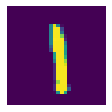

In [4]:
import matplotlib.pyplot as plt
digit = test_img[2]
digit_pixels = digit.reshape(28, 28)
plt.subplot(131)
plt.imshow(digit_pixels)
plt.axis('off')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [6]:
train_img.shape

(60000, 784)

In [7]:
from sklearn.decomposition import PCA
# Make an instance of the Model
p1 = PCA(.95)

In [8]:
p1.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
train_img = p1.transform(train_img)
test_img = p1.transform(test_img)

In [10]:
train_img[1].shape


(327,)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [13]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

In [15]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [16]:
logisticRegr.score(test_img, test_lbl)

0.9201